In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


# Load data from CSV file
file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadof1bal.xlsx'
data = pd.read_excel(file_path)
#data = pd.read_excel('c:\andre\consolidado.xlsx', sheet_name='Sheet1')

# Assuming the last column is the target/output column
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)







[0.01818969 0.11280662 0.01543279 0.01982676 0.01496748 0.02314028
 0.0190259  0.05607004 0.66990087 0.05063956]


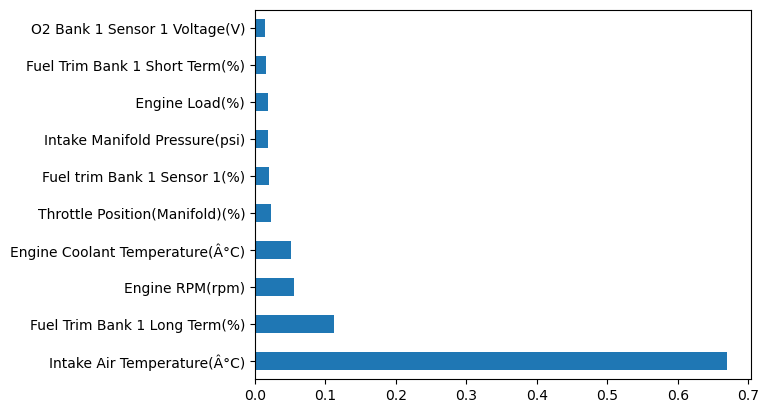

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_sca,y)
X.head()
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()




In [34]:
from sklearn.feature_selection import f_classif
import numpy as np
import pandas as pd

# Aplicando ANOVA
f_values, p_values = f_classif(X, y)

# Resultados
anova_results = pd.DataFrame({
    "Feature": X.columns,
    "F-Value": f_values,
    "P-Value": p_values
})

print("Resultados da ANOVA:")
anova_results_sorted = anova_results.sort_values(by="F-Value", ascending=False)

print(anova_results_sorted)


Resultados da ANOVA:
                           Feature      F-Value       P-Value
8      Intake Air Temperature(Â°C)  2268.347406  0.000000e+00
7                  Engine RPM(rpm)    76.076923  3.265609e-33
9  Engine Coolant Temperature(Â°C)    55.107073  2.289005e-24
2   Fuel Trim Bank 1 Short Term(%)    43.566936  1.830066e-19
3     Fuel trim Bank 1 Sensor 1(%)    30.070543  1.067148e-13
1    Fuel Trim Bank 1 Long Term(%)    27.426055  1.452187e-12
5   Throttle Position(Manifold)(%)    23.290409  8.665986e-11
4    O2 Bank 1 Sensor 1 Voltage(V)     8.484085  2.101042e-04
0                   Engine Load(%)     6.126013  2.203799e-03
6    Intake Manifold Pressure(psi)     1.430093  2.393969e-01


In [16]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# Modelo base
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Seleção de características com RFE
rfe = RFE(estimator=model, n_features_to_select=6)  # Selecionar 2 características
rfe.fit(X_train, y_train)

# Características selecionadas
print("Características selecionadas:", X.columns[rfe.support_])

# Avaliar o modelo com as características selecionadas
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

print("Acurácia com características selecionadas:", accuracy_score(y_test, y_pred))


Características selecionadas: Index([' Engine Load(%)', 'Fuel Trim Bank 1 Long Term(%)',
       'O2 Bank 1 Sensor 1 Voltage(V)', 'Engine RPM(rpm)',
       'Intake Air Temperature(Â°C)', 'Engine Coolant Temperature(Â°C)'],
      dtype='object')
Acurácia com características selecionadas: 0.8983628922237381


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Escolher manualmente as features desejadas
selected_features = [
    "Engine RPM(rpm)", 
    "Engine Coolant Temperature(Â°C)", 
    "Fuel Trim Bank 1 Short Term(%)",
    "Intake Air Temperature(Â°C)",
    "Fuel Trim Bank 1 Long Term(%)",
    "Fuel trim Bank 1 Sensor 1(%)",
    "Throttle Position(Manifold)(%)"
]


# Filtrar o dataset para manter apenas as features escolhidas
X_selected = X[selected_features]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Criar e treinar um modelo (pode ser outro modelo, dependendo do problema)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia com as features escolhidas manualmente: {accuracy:.2f}')


Acurácia com as features escolhidas manualmente: 0.92
